# Adding the needed library  

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# dowenloading the data 

In [3]:
training_data = pd.read_csv(r"train.csv")# local path ono my pc
test_data = pd.read_csv(r"test.csv")# local path ono my pc
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


có thể thấy đc Age, Cabin, Embarked bị thiếu dữ liệu 

Text(0, 0.5, 'Phần trăm (%)')

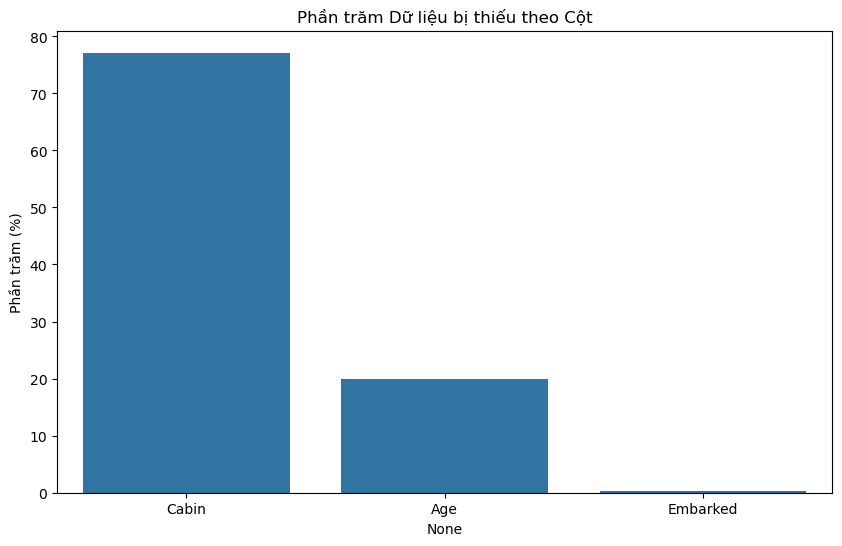

In [5]:

# Tính phần trăm thiếu
missing_percent = (training_data.isnull().sum() / len(training_data)) * 100

# Lọc ra những cột có dữ liệu thiếu
missing_data = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.title('Phần trăm Dữ liệu bị thiếu theo Cột')
plt.ylabel('Phần trăm (%)')


In [6]:
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
training_data.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [8]:
training_data.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
training_data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

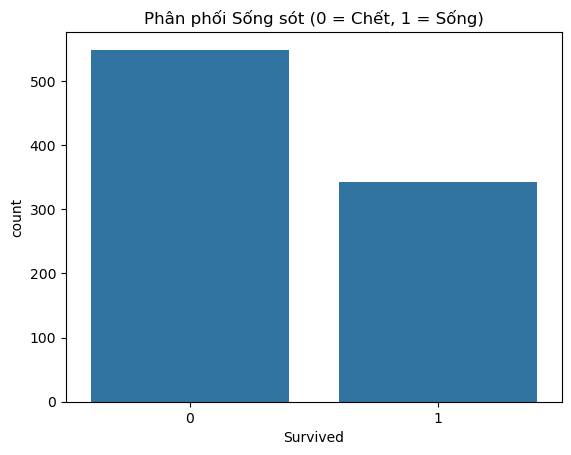

In [10]:

sns.countplot(x='Survived', data=training_data)
plt.title('Phân phối Sống sót (0 = Chết, 1 = Sống)')
plt.savefig('survival_count.png')

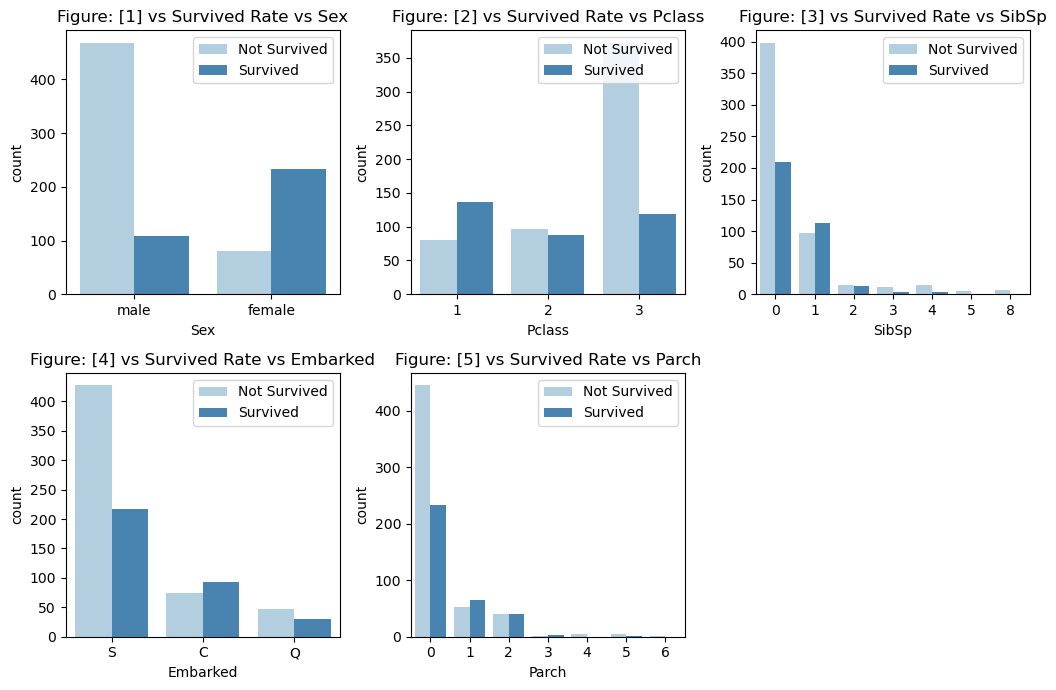

In [11]:
cols = ['Sex', 'Pclass', 'SibSp', 'Embarked', 'Parch']
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(data=training_data, x=cols[i], hue='Survived', palette='Blues', ax=ax_i)
            ax_i.set_title(f'Figure: {[i+1]} vs Survived Rate vs {cols[i]}')
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

Ma trận Tương quan

Text(0.5, 1.0, 'Ma trận tương quan')

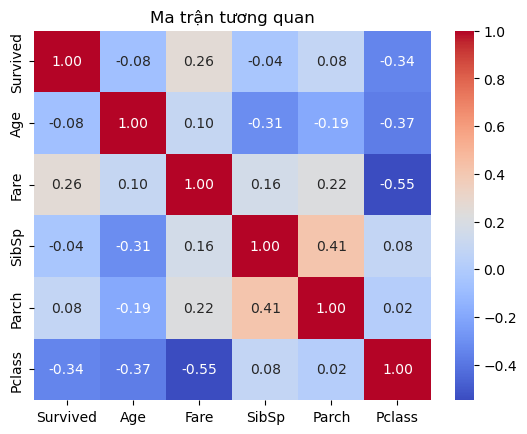

In [12]:
# Chọn các cột số
numerical_features = ['Survived', 'Age', 'Fare', 'SibSp', 'Parch', 'Pclass']
corr_matrix = training_data[numerical_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan')


In [13]:
# only 204 out of 891 are not null lets just drop cabin
training_data.drop("Cabin",axis=1,inplace=True)

Xử lý missing value

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
num_pipe= Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
    ]
)

In [15]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
cat_pipe = Pipeline([
        ("ordinal_encoder", OrdinalEncoder()),    
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])

In [16]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipe = ColumnTransformer([
        ("num", num_pipe, num_attribs),
        ("cat", cat_pipe, cat_attribs),
    ])

In [17]:
from sklearn import set_config

# Cài đặt này sẽ yêu cầu Scikit-learn hiển thị pipeline dưới dạng sơ đồ
set_config(display='diagram')

# Chỉ cần gọi tên biến pipeline, Jupyter Notebook sẽ tự động hiển thị sơ đồ
preprocess_pipe

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder()),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['Pclass', 'Sex', 'Embarked'])])

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
# split  the label and the data
y= training_data.Survived
X = training_data.drop("Survived",axis=1)
# initializzing the StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

### To ensure that the percentage of the label didn't change 

In [14]:
training_data.Survived.value_counts(normalize=1)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [15]:
y_train.value_counts(normalize=1)

Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

In [16]:
x_train = preprocess_pipe.fit_transform(X_train)
x_test = preprocess_pipe.fit_transform(X_test)
x_train

array([[-0.08113533, -0.46508428, -0.46618317, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08113533, -0.46508428, -0.46618317, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08113533, -0.46508428, -0.46618317, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.41700669,  0.47833454,  3.11571343, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.34017889, -0.46508428, -0.46618317, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08113533, -0.46508428, -0.46618317, ...,  0.        ,
         0.        ,  1.        ]])

In [17]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

models = {
    "Random Forest": (RandomForestClassifier(), {
        "n_estimators": [10, 50, 100],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
    }),
    "K Neighbors": (KNeighborsClassifier(), {
        "n_neighbors": [3, 5, 7],
        "weights": ['uniform', 'distance'],
    }),
    "Extra Trees": (ExtraTreesClassifier(), {
        "n_estimators": [10, 50, 100],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
    }),
}

In [18]:
result ={}
for model_name ,(model ,parm) in models.items():
    # initalizing grid search and fiting it 
    GridSearch = GridSearchCV(model ,parm ,cv=5,scoring="f1")
    GridSearch.fit(x_train,y_train)
    # to know how far are we
    print(model_name)
    # add ing the score and parm to a dic 
    result[model_name] =(GridSearch.best_params_,GridSearch.best_score_) 

Random Forest
K Neighbors
Extra Trees


In [19]:
for  model,(parm,score) in result.items():
    print(f"{model}the f1 score is {score},with parm of {parm}")

Random Forestthe f1 score is 0.7636600184340792,with parm of {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
K Neighborsthe f1 score is 0.7422607938180777,with parm of {'n_neighbors': 7, 'weights': 'uniform'}
Extra Treesthe f1 score is 0.7455768250790806,with parm of {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


In [20]:
x_train

array([[-0.08113533, -0.46508428, -0.46618317, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08113533, -0.46508428, -0.46618317, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08113533, -0.46508428, -0.46618317, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.41700669,  0.47833454,  3.11571343, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.34017889, -0.46508428, -0.46618317, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08113533, -0.46508428, -0.46618317, ...,  0.        ,
         0.        ,  1.        ]])

In [21]:
# random forest provides to be the best model so lets do one more grid search with more parm
# Initialize the Random Forest model
rf_model = RandomForestClassifier()
# Define a more extensive set of parameters for grid search
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, 'sqrt', 'log2'],
    "bootstrap": [True, False],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='f1', cv=5, n_jobs=-1, verbose=2)

# Now you can fit the grid search on your training data
grid_search.fit(x_train, y_train) 

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=2)

In [25]:
grid_search.best_score_

np.float64(0.7671543115850047)

In [23]:
random_forest = grid_search.best_estimator_

In [24]:
from sklearn.metrics import f1_score,recall_score,precision_score
def get_score(y_test,predict):
    f1 = f1_score(y_true=y_test,y_pred= predict)
    recall = recall_score(y_true=y_test,y_pred= predict)
    precision = precision_score(y_true=y_test,y_pred= predict)
    print (f"f1 score is {f1} \n recall score is {recall} \n precision is {precision}")


In [26]:
predict = random_forest.predict(x_test)
get_score(y_test=y_test,predict=predict)

f1 score is 0.688 
 recall score is 0.6231884057971014 
 precision is 0.7678571428571429


Ma trận nhầm lẫn

Text(0.5, 1.0, 'Ma trận Nhầm lẫn')

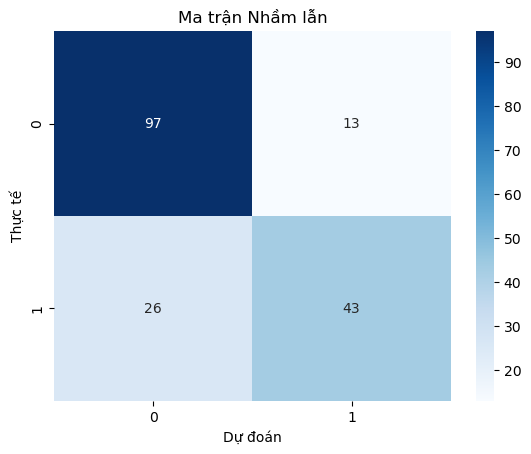

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận Nhầm lẫn')

Các feature quan trọng

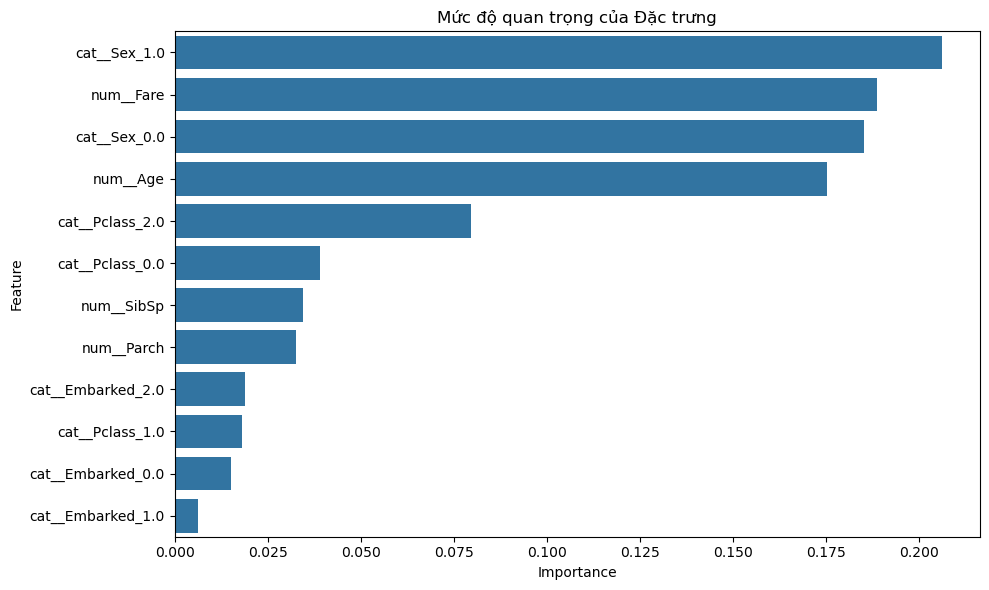

In [39]:
# (Lấy feature_names từ preprocess_pipe ở ô 15)
feature_names = preprocess_pipe.get_feature_names_out()
importances = random_forest.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Mức độ quan trọng của Đặc trưng')
plt.tight_layout()


Thấy đc feature sex là yếu tố quan trọng nhất để dự đoán 

### Biểu đồ Đánh giá Mô hình
Đường cong ROC (ROC Curve)

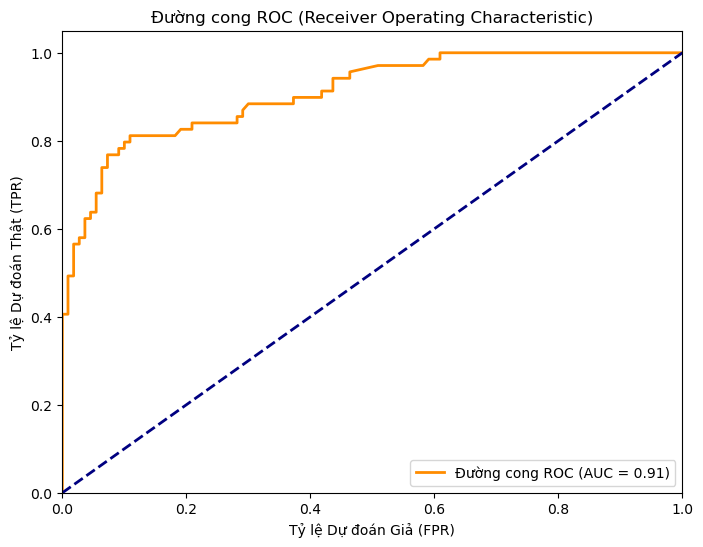

In [52]:
from sklearn.metrics import roc_curve, auc

# Lấy xác suất dự đoán cho lớp 1 (Sống sót)
# Mô hình 'random_forest' và 'x_test' đã có từ các ô trước
y_pred_proba = random_forest.predict_proba(x_test)[:, 1]

# Tính toán ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'Đường cong ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Đường tham chiếu 50/50
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tỷ lệ Dự đoán Giả (FPR)')
plt.ylabel('Tỷ lệ Dự đoán Thật (TPR)')
plt.title('Đường cong ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")


## Using the model on the testing data 
let's train the model in all of the data first to ensure we get the best result 
 

In [27]:
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [28]:
final_x = preprocess_pipe.fit_transform(X)
test_data_processed = preprocess_pipe.fit_transform(test_data)
random_forest.fit(final_x,y)
test_data["Survived"] = random_forest.predict(test_data_processed)

In [29]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [31]:
submission = test_data[["PassengerId","Survived"]]
submission.to_csv("submition.csv",index=False)